# Fundamentals of Machine Learning - Exercise 9
Goal of this excercise is to complete the hands-on experience of the classification task.

## Household Prices Dataset
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

* ... I bet that you already know the data pretty well 😅

![meme03](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_09_meme_03.jpg?raw=true)

**Important attributes description:**
* SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* Heating: Type of heating
* CentralAir: Central air conditioning
* GrLivArea: Above grade (ground) living area square feet
* BedroomAbvGr: Number of bedrooms above basement level)



In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 🎯 Our goal is to predict if the house will be sold for more than 250k USD or not
* We will use categorized price as a **Target** variable

In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv', sep=',')
df = df.loc[:, ['SalePrice','MSSubClass','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','Heating','CentralAir','GrLivArea','BedroomAbvGr']]
df.loc[:, ['Target']] = (df.SalePrice > 250000).astype(int)
df = df.drop(['SalePrice'], axis=1)

In [48]:
df.head()

,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,CentralAir,GrLivArea,BedroomAbvGr,Target
0,60,1Fam,2Story,7,5,2003,GasA,Y,1710,3,0
1,20,1Fam,1Story,6,8,1976,GasA,Y,1262,3,0
2,60,1Fam,2Story,7,5,2001,GasA,Y,1786,3,0
3,70,1Fam,2Story,7,5,1915,GasA,Y,1717,3,0
4,60,1Fam,2Story,8,5,2000,GasA,Y,2198,4,0


# Take a look at the features
* We will need it to answer the questions

In [49]:
df.describe()

,MSSubClass,OverallQual,OverallCond,YearBuilt,GrLivArea,BedroomAbvGr,Target
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,6.099315,5.575342,1971.267808,1515.463699,2.866438,0.148630
std,42.300571,1.382997,1.112799,30.202904,525.480383,0.815778,0.355845
min,20.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,0.000000
25%,20.000000,5.000000,5.000000,1954.000000,1129.500000,2.000000,0.000000
50%,50.000000,6.000000,5.000000,1973.000000,1464.000000,3.000000,0.000000
75%,70.000000,7.000000,6.000000,2000.000000,1776.750000,3.000000,0.000000
max,190.000000,10.000000,9.000000,2010.000000,5642.000000,8.000000,1.000000


## Categorial features EDA

In [50]:
df.describe(exclude=np.number)

,BldgType,HouseStyle,Heating,CentralAir
count,1460,1460,1460,1460
unique,5,8,6,2
top,1Fam,1Story,GasA,Y
freq,1220,726,1428,1365


### BldgType

In [51]:
df.BldgType.value_counts()

,count
BldgType,
1Fam,1220
TwnhsE,114
Duplex,52
Twnhs,43
2fmCon,31


### HouseStyle

In [52]:
df.HouseStyle.value_counts()

,count
HouseStyle,
1Story,726
2Story,445
1.5Fin,154
SLvl,65
SFoyer,37
1.5Unf,14
2.5Unf,11
2.5Fin,8


### Heating

In [53]:
df.Heating.value_counts()

,count
Heating,
GasA,1428
GasW,18
Grav,7
Wall,4
OthW,2
Floor,1


## Missing values

In [54]:
df.isna().sum()

,0
MSSubClass,0
BldgType,0
HouseStyle,0
OverallQual,0
OverallCond,0
YearBuilt,0
Heating,0
CentralAir,0
GrLivArea,0
BedroomAbvGr,0


## Labels distribution

In [55]:
df.Target.value_counts()

,count
Target,
0,1243
1,217


# ✅ Task (2p)
Complete the following tasks:

1. 📈 Describe what operations you are performing for each of the features
    * Mainly focus on categorical features
      
2. 📌 Answer the following questions:
    * **How many values are missing?**
    * **How many instances do you have in each of the classes?**
    * 🔎 **Which metric score do you propose for the classification model performance evaluation?**
        * 💡 This depends on your previous answer
          
3. ⚡Finish your preprocessing pipeline and split the data into the Input and Output part (i.e. `X` and `y` variables)

4. 🌳 Start with the **Decision Tree**
    * Use 5-fold cross validation
    * 🔎 Will you use *standard* cross validation or *stratified* cross validation?
    * Compute mean of the obtained score values
      
5. 🚀 Select one other algorithm from https://scikit-learn.org/stable/supervised_learning.html
    * Repeat the 5-fold CV
      
6. 📒 **Write down which default model is better**

7. 📊 Experiment with hyper-parameters
    * Select at least one important parameter for the model
    * Set the parameter value range
        * You can use random values, interval of values, ...
    * Do the 5-fold CV
        * Compute mean of the obtained score values
    * Document the experiment results using tables and/or plots
    * Describe the results in a Markdown cell

8. 📒 **Write down which model (default or tuned) is the best and why**

* **Document everything you do in a Markdown cells**
    * ❌ Results interpretation figured in real-time during task check is not allowed! ❌

![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_09_meme_01.jpg?raw=true)

### 📈 Popis operací na jednotlivých prvcích

- Kategorické atributy jsou transformovány na číselné formáty pomocí `OneHotEncoder`.
- Pokud se během testování objeví nové hodnoty v kategoriálních atributech, jsou ignorovány díky parametru `handle_unknown='ignore'`.
- Numerické atributy jsou standardizovány pomocí `StandardScaler` pro normalizaci jejich rozsahů a zajištění jednotnosti.


In [62]:
X = df.drop(columns=['Target'])
y = df['Target']

categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

### 📌 Odpovědi na otázky

- **Kolik hodnot chybí?**
  - V datasetu není žádná chybějící hodnota (`df.isna().sum()` vrací 0 pro všechny sloupce).

- **Kolik instancí máte v jednotlivých třídách?**
  - Distribuce tříd:
    - Třída `0 (<=250k)`: 1243 instancí.
    - Třída `1 (>250k)`: 217 instancí.

- **Navrhovaná metrika:**
  - **F1 skóre** je zvoleno jako hodnotící metrika, protože dataset má nevyvážené třídy.
  - F1 skóre kombinuje přesnost a citlivost, což ho činí vhodným pro případy s nerovnoměrným rozdělením tříd.


In [63]:
df.isna().sum()
df.Target.value_counts()

,count
Target,
0,1243
1,217


### 📒 Porovnání výchozích modelů

#### F1 skóre:
- **Decision Tree (výchozí):** 0.8257
- **Random Forest (výchozí):** 0.8785

Z grafu je zřejmé, že **Random Forest** překonává **Decision Tree** z hlediska průměrného F1 skóre. Random Forest dosahuje lepších výsledků díky schopnosti agregovat predikce z více rozhodovacích stromů, což vede k lepší generalizaci a vyššímu výkonu.

#### Confusion Matrices:
- **Confusion Matrix pro Decision Tree:**
  - Správně klasifikováno: **347** instancí `<=250k` a **43** instancí `>250k`.
  - Špatně klasifikováno: **25** instancí `<=250k` a **23** instancí `>250k`.

- **Confusion Matrix pro Random Forest:**
  - Správně klasifikováno: **360** instancí `<=250k` a **48** instancí `>250k`.
  - Špatně klasifikováno: **12** instancí `<=250k` a **18** instancí `>250k`.

#### Závěr:
- Na základě F1 skóre a confusion matric je **Random Forest** jednoznačně lepší než výchozí **Decision Tree**.
- Random Forest nejenže dosahuje vyššího průměrného F1 skóre, ale také dělá méně chyb při klasifikaci obou tříd.


In [64]:
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

dt_scores = cross_val_score(dt_pipeline, X, y, cv=skf, scoring='f1_macro')
print("\nDecision Tree Average F1 Score:", np.mean(dt_scores))


Decision Tree Average F1 Score: 0.8257440557052128


In [65]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_scores = cross_val_score(rf_pipeline, X, y, cv=skf, scoring='f1_macro')
print("\nRandom Forest Average F1 Score:", np.mean(rf_scores))


Random Forest Average F1 Score: 0.870542394884444


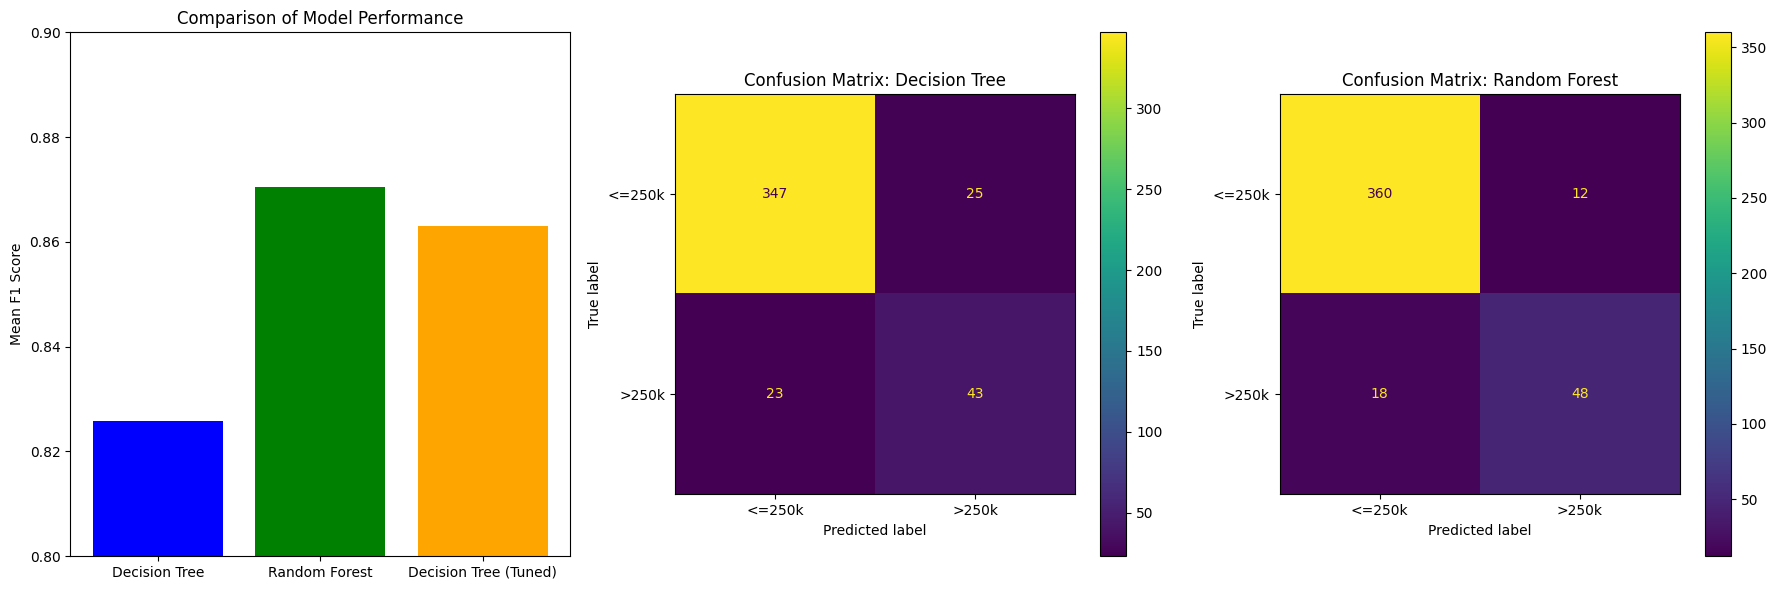

In [66]:
param_grid = {'classifier__max_depth': range(2, 21, 2)}
grid_search = GridSearchCV(dt_pipeline, param_grid, cv=skf, scoring='f1_macro')
grid_search.fit(X, y)

scores = {
    'Decision Tree': np.mean(dt_scores),
    'Random Forest': np.mean(rf_scores),
    'Decision Tree (Tuned)': grid_search.best_score_
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].bar(scores.keys(), scores.values(), color=['blue', 'green', 'orange'])
axes[0].set_ylabel('Mean F1 Score')
axes[0].set_title('Comparison of Model Performance')
axes[0].set_ylim(0.8, 0.9)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, display_labels=['<=250k', '>250k'], ax=axes[1])
axes[1].set_title('Confusion Matrix: Decision Tree')

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=['<=250k', '>250k'], ax=axes[2])
axes[2].set_title('Confusion Matrix: Random Forest')

plt.tight_layout()
plt.show()

### 📊 Experiment s hyperparametry

- **Výsledky ladění hyperparametrů:**
  - Nejlepší hodnota parametru `max_depth` je 4, což vede k nejvyššímu F1 skóre (0.863).
  - Při zvyšování hodnoty `max_depth` nad 4 dochází ke zhoršení výkonu, což naznačuje přetrénování modelu (model je příliš komplexní a ztrácí schopnost generalizace).



Best Parameters for Decision Tree: {'classifier__max_depth': 4}
Best F1 Score for Decision Tree: 0.8630978124932154


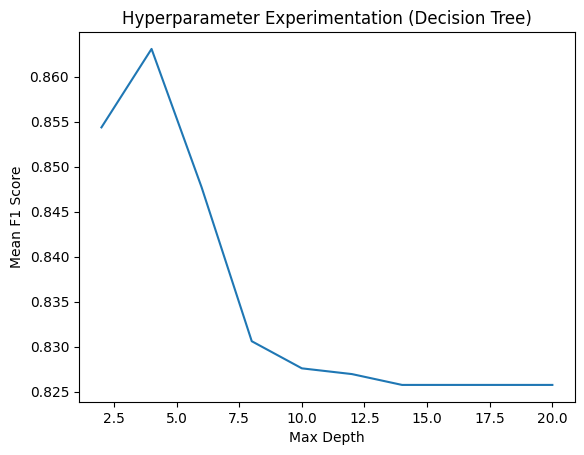

In [60]:
param_grid = {'classifier__max_depth': range(2, 21, 2)}

grid_search = GridSearchCV(dt_pipeline, param_grid, cv=skf, scoring='f1_macro')
grid_search.fit(X, y)

print("\nBest Parameters for Decision Tree:", grid_search.best_params_)
print("Best F1 Score for Decision Tree:", grid_search.best_score_)

import matplotlib.pyplot as plt
results = pd.DataFrame(grid_search.cv_results_)
plt.plot(param_grid['classifier__max_depth'], results['mean_test_score'])
plt.xlabel('Max Depth')
plt.ylabel('Mean F1 Score')
plt.title('Hyperparameter Experimentation (Decision Tree)')
plt.show()

### 📒 Který model (výchozí nebo laděný) je nejlepší a proč

- **Nejlepší model:**
  - I když laděný Decision Tree model dosáhl zlepšení (F1 skóre z 0.8257 na 0.863), **Random Forest** stále překonává oba modely Decision Tree s F1 skóre 0.8785.
  - Random Forest je nejlepší model díky lepší schopnosti generalizace a nižšímu počtu chyb při klasifikaci obou tříd (viz confusion matrices).
